In [2]:
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Reading data of file and classifying it in dependent and independent variables (Y)


In [19]:
data = pd.read_csv('C:/Users/33789/Downloads/diabetes.csv')
Y = data['class']
X = data.drop(['class'],axis=1)

Splitting data into training and testing

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size=0.34, random_state=10)


Creating new decision tree, in thi scase with depth= 1 

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)

Fitting training data into our decision tree 

In [26]:
clf = clf.fit(X_train, Y_train)

Generating predictions of indep var from data 

In [27]:
Ypredicted = clf.predict(X_train)

Computing accuracy between the predictions to test data (we know this one is true ) 

In [28]:
acc = accuracy_score(Y_train, Ypredicted)

In [29]:
print(acc)

0.7648221343873518


In [31]:
Ypredicted_test = clf.predict(X_test)

In [32]:
acc = accuracy_score(Y_test, Ypredicted_test)

In [33]:
print(acc
     )

0.7213740458015268


As we can see the training accuracy is slighty higher than the testing accuracy, since this one-depth tree was trained with training data and thus having a greater accuracy 

In [35]:
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)

In [36]:
clf2 = clf2.fit(X_train, Y_train)

In [37]:
Ypredicted2 = clf2.predict(X_train)
acc2 = accuracy_score(Y_train, Ypredicted2)
print(acc2)

1.0


In [39]:
Ypredicted_test2 = clf2.predict(X_test)
acc = accuracy_score(Y_test, Ypredicted_test2)
print(acc)


0.7442748091603053


As we can see the accuracy for the training data is 1, this makes sense since the decision tree has no limit on depths and can be modelled exactly as the data provided, compared to one-depth tree that had 0.76 for the training accuracy since it has a boundary of 1 ply for the entire tree, making it much more inaccurate. 
As in for the testing accuracy the multiple-depths tree exceeds the one-depth but not for too much having 0.74 and 0.72 respectively. The later is explained since the multi-layered tree is expected to be modelled from the data provided and teh other one is modelled by the data given that there is a maximum of one level. Nevertheless, I was expecting this difference in teting-accuracy be much more significant


In [41]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 768)

given that there is 768 instances, put the size on min_samples_leafs

In [43]:
clf = clf.fit(X_train, Y_train)
Ypredicted = clf.predict(X_train)
acc = accuracy_score(Y_train, Ypredicted)
print('traing data acc')
print(acc )
Ypredicted_test = clf.predict(X_test)
acc2 = accuracy_score(Y_test, Ypredicted_test)
print('testing data acc')
print(acc2 )

traing data acc
0.6561264822134387
testing data acc
0.6412213740458015


Comparing all accuracies obtained, this later one  is the smallest yet. This might be because by instantating a tree that has a minimum number of leafs of the size of the dataset it obliges it to have all nodes as leafs, making it a one-depth tree, making the tree solely of the root and then all the leaf nodes that in the multi_level tree would correspond to different plys where the classification fo the instances help a better model and hence a higher accuracy  

Text(0, 0.5, 'Accuray of Decision tree ')

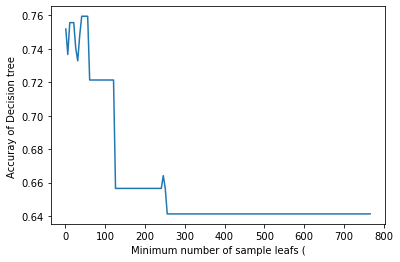

In [56]:
accuracy = []
size_of_tree = []
for x in range(1, 769, 5):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = x, max_depth = None)
    size_of_tree.append(x)
    clf = clf.fit(X_train, Y_train)
    Ypredicted_test = clf.predict(X_test)
    acc = accuracy_score(Y_test, Ypredicted_test)
    accuracy.append(acc)

plt.plot(size_of_tree, accuracy)
plt.xlabel('Minimum number of sample leafs ')
plt.ylabel('Accuray of Decision tree ')
    

*the range is until 769 since this last number won't be tested thus ensuring 768 will be tested if it falls in the steps of 5

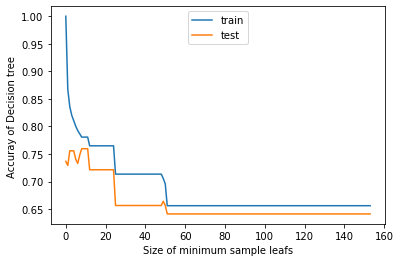

In [57]:
train = []
test = []
size_of_tree = []

for x in range(1, 769, 5):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = x, max_depth = None)
    size_of_tree.append(x)
    clf = clf.fit(X_train, Y_train)
    Ypredicted_train = clf.predict(X_train)
    Ypredicted_test = clf.predict(X_test)
    test.append(accuracy_score(Y_test, Ypredicted_test))
    train.append(accuracy_score(Y_train, Ypredicted_train))

plt.plot(train, label= 'train')
plt.plot(test, label = 'test')
plt.xlabel('Size of minimum sample leafs')
plt.ylabel('Accuray of Decision tree ')
plt.legend(loc='upper center')

In the previous plot, we can only see overfitting. The graph should be read right to left, as the tree grows bigger, ie less minimum amount of sample leafs ( since the rest of nodes will be internal nodes), the difference between the accuracy of the training data and the testing data grows apart. So when we reach the most left values the accuracy of the training data is 1 (we saw this when we created a multileveled tree ) and the testing accuracy only reaches 0.75, thus a clear example of overfitting the data. 
At the beginning, when both accuracies lines are parallel, we can classify this as underfitting. 



# glass dataset


experiment in the same manner with different dataset, namely glass.csv


In [59]:
data = pd.read_csv('C:/Users/33789/Downloads/glass.csv')
Y = data['class']
X = data.drop(['class'],axis=1)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size=0.34, random_state=10)

creating one depth tree 

In [61]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)
clf = clf.fit(X_train, Y_train)

In [62]:
Ypredicted = clf.predict(X_train)
acc = accuracy_score(Y_train, Ypredicted)
print (acc)

0.46099290780141844


accuracy of testing data

In [67]:
Ypredicted_test2 = clf.predict(X_test)
acc = accuracy_score(Y_test, Ypredicted_test2)
print(acc)

0.4246575342465753


Indeed test accuracy is lower than train accuracy

Multi-level decision tree

In [69]:
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf2 = clf2.fit(X_train, Y_train)

In [70]:
Ypredicted2 = clf2.predict(X_train)
acc2 = accuracy_score(Y_train, Ypredicted2)
print(acc2)

1.0


In [71]:
Ypredicted2_test = clf2.predict(X_test)
acc2 = accuracy_score(Y_test, Ypredicted2_test)
print(acc2)

0.6301369863013698


Multilevel tree has a much higher accuracy than onelevel tree given that thanks to the multiple levels it helps models better the data and thus be more accurate

Testing pre-pruning error by modifing the number of leafs the decision tree has 

In [73]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 768)

In [74]:
clf = clf.fit(X_train, Y_train)
Ypredicted = clf.predict(X_train)
acc = accuracy_score(Y_train, Ypredicted)
print(acc )


0.3546099290780142


In [75]:
Ypredicted_test = clf.predict(X_test)
acc2 = accuracy_score(Y_test, Ypredicted_test)
print('testing data acc')
print(acc2 )

testing data acc
0.3561643835616438


The difference in accuracy of testing and training are surprinsingly small, this might be explained by the already relative low accuracy we obtained at the beginning while using the glass-dataset, and now computing the accuracy of a decision tree that has all nodes as leafs but the root returns us a even smaller accuracy. (this makes sense since this decision tree is not optimal for modelling the data and hence obtaining an even smaller accuracy than before)

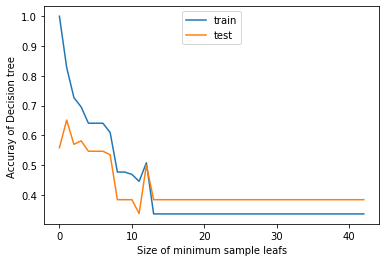

In [8]:
train = []
test = []
size_of_tree = []

for x in range(1, 215, 5):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = x, max_depth = None)
    size_of_tree.append(x)
    clf = clf.fit(X_train, Y_train)
    Ypredicted_train = clf.predict(X_train)
    Ypredicted_test = clf.predict(X_test)
    test.append(accuracy_score(Y_test, Ypredicted_test))
    train.append(accuracy_score(Y_train, Ypredicted_train))

plt.plot(train, label= 'train')
plt.plot(test, label = 'test')
plt.xlabel('Size of minimum sample leafs')
plt.ylabel('Accuray of Decision tree ')
plt.legend(loc='upper center')

At the left side of the graph the data is underfitted (the two lines are parallel) ,just when the two lines get really close we could consider it optimal and when the accuracy of the training increase at a higher rate than the testing line it is considered as overfitting

# testing a bit more 


In [3]:
data = pd.read_csv('C:/Users/33789/Downloads/glass.csv')
Y = data['class']
X = data.drop(['class'],axis=1)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size=0.20, random_state=10)

In [5]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)
clf = clf.fit(X_train, Y_train)
Ypredicted = clf.predict(X_train)
acc = accuracy_score(Y_train, Ypredicted)
print (acc)

0.4327485380116959


In [6]:
Ypredicted_test2 = clf.predict(X_test)
acc = accuracy_score(Y_test, Ypredicted_test2)
print(acc)

0.5116279069767442


By reducing the size of the test set we obtained a higher accuracy, this can be explained since there is more data used to build the model thus achieving a better structured or better informed decision tree and thus obtaining a higher accuracy than when the test set was 0.34 approx 1/3 of the entire data set, in this case the test set is 1/5 of the entire dataset. 
Something very weird is presented here, the testing accuracy is bigger than the training accuracy!! this is very interesting :)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size=0.40, random_state=10)
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)
clf = clf.fit(X_train, Y_train)
Ypredicted = clf.predict(X_train)
acc = accuracy_score(Y_train, Ypredicted)
print (' training acc')
print (acc)
Ypredicted_test2 = clf.predict(X_test)
acc2 = accuracy_score(Y_test, Ypredicted_test2)
print ('testing acc')
print(acc2)

 training acc
0.46875
testing acc
0.4186046511627907


Now we reduced the training set to 3/5 and test set to 2/5, as a result we come back to our normal proportion such that the training acc is higher than the testing acc and we obtained similar accuracies to the original split of the data 

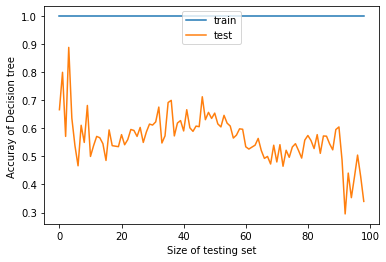

In [13]:
train = []
test = []
test_size = []

for x in range(1, 100 , 1):
    y = x/100
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size= y, random_state=10)
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
    test_size.append(y)
    clf = clf.fit(X_train, Y_train)
    Ypredicted_train = clf.predict(X_train)
    Ypredicted_test = clf.predict(X_test)
    test.append(accuracy_score(Y_test, Ypredicted_test))
    train.append(accuracy_score(Y_train, Ypredicted_train))

plt.plot(train, label= 'train')
plt.plot(test, label = 'test')
plt.xlabel('Size of testing set')
plt.ylabel('Accuray of Decision tree ')
plt.legend(loc='upper center')

Since we have a multilevel tree, our training acc reaches 1.0, observing the testing line, we see that the its maximum point is when the testing set is 2/10, thus we can reflect that the optimal size of the testing set is a bit less than 1/3 

CHANGING RANDOM STATE 

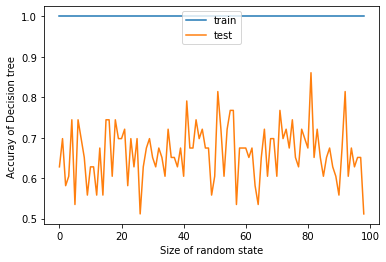

In [14]:
train = []
test = []
random_state = []

for x in range(1, 100 , 1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size= 0.20, random_state=x)
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
    random_state.append(x)
    clf = clf.fit(X_train, Y_train)
    Ypredicted_train = clf.predict(X_train)
    Ypredicted_test = clf.predict(X_test)
    test.append(accuracy_score(Y_test, Ypredicted_test))
    train.append(accuracy_score(Y_train, Ypredicted_train))

plt.plot(train, label= 'train')
plt.plot(test, label = 'test')
plt.xlabel('Size of random state')
plt.ylabel('Accuray of Decision tree ')
plt.legend(loc='upper center')